# Semesterarbeit Teil2 - Codierungstheorie

_Autor: Chantale Gihara_

_Abgabe: 17.11.2021_

## Einführung:

Im Rahmen des Modules Lineare Algebra haben wir folgenden Auftrag für Teil 2 erhalten:

* Schreiben Sie eine Python-Klasse HammingCode:
* Die Klasse besitze einen Konstruktor HammingCode(k) für Codes der Länge n=2k−1.
* Die Klasse besitze die folgenden Methoden: 

     `get_generator_matrix()`
    
     `get_check-matrix()`
    
     `encode(word)`
     
    
* Erzeuge ein Codewort aus einem 0-1-Wort

     `decode(codeword)`
    
    

* Decodiere ein Codewort und führe allenfalls eine Fehlerkorrektur durch

     `check(codeword)`
     
    
* Überprüfe, ob ein angegebenes Codewort ein korrektes Codewort ist.

[1]

Zuerst werde ich die Theorie und die Idee des Hamming Codes beschreiben, danach versuche ich Schritt für Schritt die Funktionen in Python zu programmieren.

Dabei werde ich die Funktionen und deren Ausführung auskommentieren.

## Codierungstheorie

Die Zielsetzung einer Kodierungtheorie ist die Absicherung gegen Übertragungsfehler, das automatische erkennen und korrigieren der Übertragungsfehler.

Beim Senden und Empfangen von Informationen über unzuverlässige Kanäle (und die meisten Kanäle sind unzuverlässig) ist es häufig erforderlich, zu überprüfen, ob die übertragenen Informationen korrekt sind. Diese Prüfungen lassen sich im Allgemeinen in zwei Kategorien unterteilen: 

1) Fehlererkennung, bei der überprüft wird, ob während der Übertragung ein Fehler aufgetreten ist

2) Fehlerkorrektur, bei der dieser Fehler erkannt und korrigiert wird.

Fehlererkennung ist nichts Neues. Zwischen dem 7. und 10. Jahrhundert n. Chr. schuf eine Gruppe jüdischer Schreiber die Numerische Masorah, um sicherzustellen, dass die hebräischen heiligen Texte korrekt kopiert werden. Dies geschieht, indem die Anzahl der Wörter in einer Zeile, einem Abschnitt, einem Buch usw. sowie der Wortverwendungsstatistik an den Rändern notiert wird.
In Soft- und Hardware sind Fehlererkennung und -korrektur fast allgegenwärtig, was sie manchmal unsichtbar macht. Im TCP/IP-Stack verwendet beispielsweise jeder Ethernet-Frame die CRC-32-Fehlererkennung. Der IPv4-Header hat eine Prüfsumme, um seinen Inhalt zu schützen. Fehlerkorrekturcodes werden in CD-Playern, in Hochgeschwindigkeitsmodems, in der Deep-Space-Kommunikation, RAM-Modulen, Datenspeichern, QR-Codes und vielen weiteren Fällen verwendet, in denen Daten übertragen, gespeichert oder auf die eine oder andere Weise verifiziert werden müssen.

[9]

### Prüfsumme
Prüfziffern dienen zur Erkennung von Rechtschreib- oder Übertragungsfehlern in sicherheitsrelevanten Daten. Die einfachste Prüfziffer ist die sogenannte Paritätsprüfung. Als Prüfbit wird eine Folge von Bits (also Nullen und Einsen) verwendet, die so angehängt wird, dass die Anzahl der Einsen im gesamten Wort einschliesslich des Prüfbits gerade ist. Zum Beispiel muss als Prüfbit eine 1 an das Wort 1101000 angehängt werden und an das Wort 0011000 muss eine 0 angehängt werden. Ist jetzt in
ein einzelnes Bit in einem gültigen Datenwort gestört, ist (gestört bedeutet: es kippt um, aus einer 1 wird 0 und aus 0 wird 1), dann ist die Anzahl der Einsen ungerade.

[4]

Beispielsweise eine  Visa-Kreditkartennummer `4001 5900 0000 0001`. Die letzte Ziffer ist 1 – das ist die Prüfsummennummer.
Der Rest der 15 Ziffern sind wie folgt:
`4 0 0 1 5 9 0 0 0 0 0 0 0 0 0`
Beginnend mit der ersten Ziffer wird dann jede 2te Ziffer verdoppelt.
`8 0 0 1 10 9 0 0 0 0 0 0 0 0 0`
Jedes Mal, wenn man eine zweistellige Zahl hat, addiert man diese Ziffern zu einer einzigen Ziffer (in diesem Beispiel ergibt es 10, also addiert man diese 1 + 0 zu 1 zusammen.
`8 0 0 1 1 9 0 0 0 0 0 0 0 0 0`
Nun addiert man alle Zahlen zusammen.
`8 + 0 + 0 + 1 + 1 + 9 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 = 19`
Diese Nummer wird dann zu der Prüfziffer hinzugefügt:
`19 + 1 = 20`
Wenn die Zahl ein Vielfaches von 10 ist, ist die Zahl gültig. Aus diesem Grund wird dieser Algorithmus manchmal auch als Modulus-10-Algorithmus bezeichnet.
Neben Kreditkarten wurden Prüfsummen für IMEI-Nummern, Personalausweisnummern (Singapurs NRIC-Nummer verwendet einen Modulus-11-Prüfsummenalgorithmus), Kfz-Kennzeichen und so weiter verwendet.

[9]

### Parity
In der Mathematik ist der Begriff Parität eine Eigenschaft einer ganzen Zahl, unabhängig davon, ob sie ungerade oder gerade ist. Beispielsweise ist die Parität von 3 ungerade, die Parität von 402 gerade. Paritätsbits oder Prüfbits sind Bits, die zu einer Binärcodefolge hinzugefügt werden, um sie entweder ungerade oder gerade zu machen. Paritätsbits sind eine der frühesten und immer noch gebräuchlichsten Methoden zur Fehlererkennung.

Ein Bit (0 oder 1), das einer Binärzahl z.B. `1001100` hinzugefügt wird, um zu überprüfen, ob die Zahl richtig empfangen wird.

Für "gerade Parität" werden alle "1"-Bits gezählt, und wenn diese Zählung ungerade ist, wird das Paritätsbit auf 1 gesetzt, um eine gerade Zahl von Einsen zu bilden.

Einschliesslich des Paritätsbits haben alle Binärzahlen eine gerade Zahl von Einsen. Wenn eine Nummer NICHT funktioniert, ist ein Fehler aufgetreten und die Nummer kann erneut gesendet werden.

[10]

### Fehler Korrektur
Eine der einfachsten Möglichkeiten zur Fehlerkorrektur besteht darin, die Daten mehr als einmal zu senden. Dies ist die Grundlage von Wiederholungscodes. Durch mehrmaliges Senden der gleichen Daten kann der Empfänger erkennen, ob ein Fehler aufgetreten ist (wenn die 3 Nachrichten nicht gleich sind) und wo der Fehler auftritt (eine einfache Mehrheit gewinnt). Dies bedeutet, dass die Anzahl der gesendeten Codes nicht gerade sein sollte. 

[9]

## Hamming Code

Richard Hamming war ein amerikanischer Mathematiker, dessen Arbeit viele Anwendungen im Bereich für Computertechnik und Telekommunikation fand. Er war Teil des Manhattan-Projekts am Los Alamos Laboratory und auch an den Bell Telephone Laboratories. Als er in den Bell Labs war, arbeitete er am Model V, einem elektromechanischen Computer, der Eingaben auf Lochstreifen aufnahm. Wenn Fehler auf dem Band erkannt wurden, stoppte die Maschine und alarmierte die Bediener, damit der Fehler behoben werden konnte.

Hamming dachte, da die Maschine Fehler erkennen könnte, könnte sie doch auch die Position des Fehlers lokalisieren und korrigieren? Seine Frustration trieb ihn dazu, an Algorithmen zu arbeiten, die Fehlerkorrekturen durchführen konnten. Er entwarf die Nomenklatur um auch die Algorithmen zu beschreiben, zum Beispiel kann der ASCII-Paritätsalgorithmus als (8,7)-Code mit insgesamt 8 Bits beschrieben werden, und 7 Bits sind Datenbits. Die Coderate oder das Verhältnis von Datenbits zu allen Bits beträgt 7/8 (87,5% der Bits sind Daten). Der Wiederholungscode, über den wir zuvor gesprochen haben, ist ein (3,1)-Code, bei dem nur 33,33 % der Bits Daten sind. Er entwarf auch den sogenannten Hamming-Code, der einer der frühesten erfundenen Fehlerkorrekturcodes ist. Es verwendet Parität, um die Position des Fehlers zu bestimmen.

**Definition**:
_Eine injektive Abbildung C:A $=>$ $\sum$ heisst Kodierung und C(A) ist ein Code Element von C(A) und diese heissen Codeworte_

Ein ganz einfaches Beispiel ist einfach das Wort 1 und 0:

|Sender|Knal|Empfänger|
|---|---|---|
|A = {0,1}|$\sum$ = {0,1}|A = {0,1}|



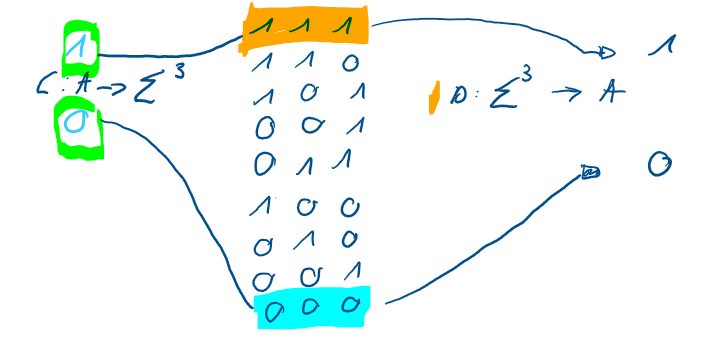

Ein Wort 1 und 0 wird in der dritten-Dimension übergeben, dabei ist das korrekte Wort 111 und 000 damit dies bei Empfänger auch so ankommt. Alle andere Möglichkeiten sind mögliche Fehlerübertragungen.



Anhand eines Beispiels:

### Encode

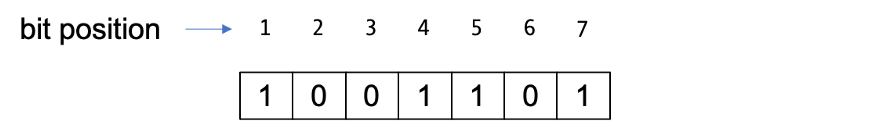 

Um dieses Datenpaket zu codieren, müssen die Bitpositionen mit Zweierpotenzen als Paritätsbits genommen werden, während der Rest Datenbits sind. Die Paritätsbits befinden sich hier also an den Bitpositionen 1, 2, 4 und 8, die binär `0001`, `0010`, `0100` und `1000` sind.
[9]

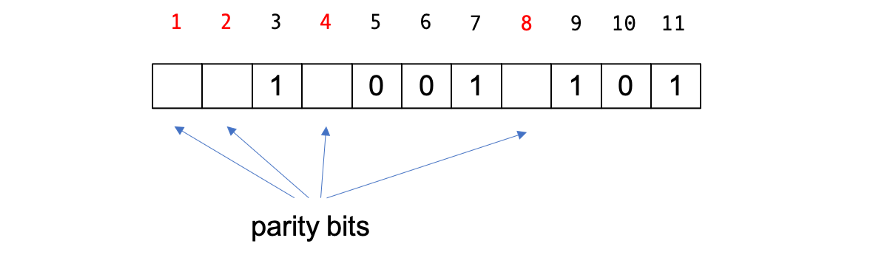 [9]

Jedes Paritätsbit deckt Bitpositionen ab, die durch die binäre Form seiner Bitposition bestimmt werden. Zum Beispiel deckt es für Bit 1 alle Bitpositionen ab, bei denen das niedrigstwertige Bit gesetzt ist, z.B. 3 `11`, 5 `101`, 7, `111`, 9 `1001` und 11 `1011`. Beachten Sie, dass das letzte signifikante Bit eine 1 ist.
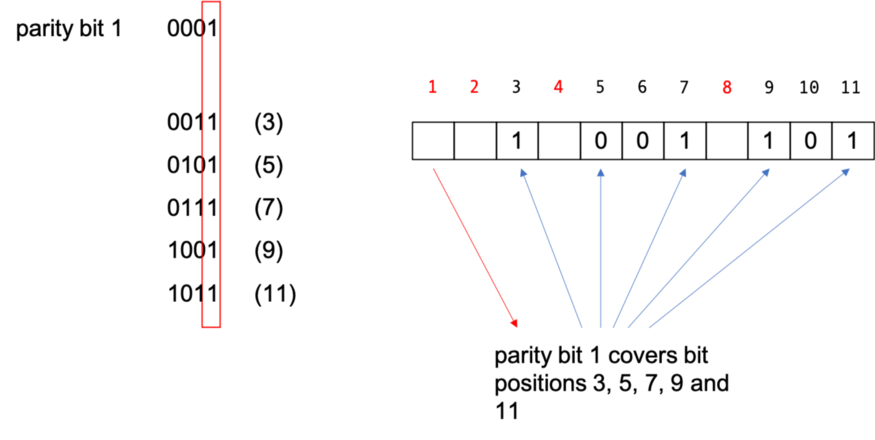
[9]

Die Bitposition 3 ist `1` und die Bitposition 5 ist `0`, die Bitposition 7 ist auch `1`, die Bitposition 9 ist `1` und Bit 11 ist ebenfalls eine `1`. 
Wenn man addiert, ist es 4. Angenommen, man will eine gerade Parität (ob gerade oder ungerade Parität spielt keine Rolle, solange das Codieren und Decodieren konsistent ist. Danach wird das Paritätsbit 1 auf 0 gesetzt.
Für Paritätsbit 2 werden alle Bitpositionen abgedeckt, bei denen das zweitniedrigstwertige Bit gesetzt ist. Das bedeutet, dass Paritätsbit 2 die Bitpositionen 3 `0011`, 6 `0110`, 7 `0111`, 10 `1010` und 11 `1011` abdeckt. Wenn diese Positionen überprüft werden, kann man erkennen, dass die entsprechenden Bits `1`, `0`, `1`, `0`, `1` sind, was zusammen 3 ergibt. Um eine gleichmäßige Parität zu erzielen, muss das Paritätsbit 2 zu 1 umgewandelt werden.
Auf die gleiche Weise deckt Paritätsbit 4 die Bitpositionen 5, 6 und 7, die `0`, `0` und `1` sind, ab, also muss das Paritätsbit 4 eine `1` sein. Paritätsbit 8 deckt die Bitpositionen 9, 10 und 11 ab, die `1`,`0` und sind `1`, also muss Paritätsbit 8 eine `0` sein. [9]

Das kann auch infolgender Darstellung verständlicher gemacht werden, in diesem Beispiel einfach mit 4 Datenbits und 3 Paritätsbits:
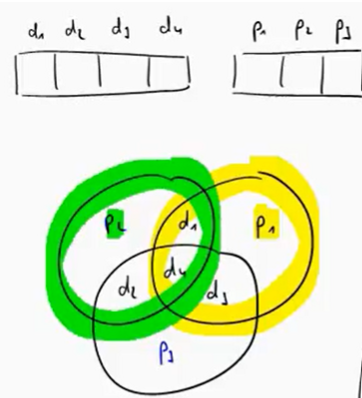
* $P_1$: ist zuständig für die Überprüfung von $d_1$,  $d_3$,  $d_4$
* $P_2$: ist zuständig für die Überprüfung von $d_1$,  $d_2$,  $d_4$
* $P_3$: ist zuständig für die Überprüfung von $d_2$,  $d_3$,  $d_4$
[4]



Der endgültige codierte (11,7) Code: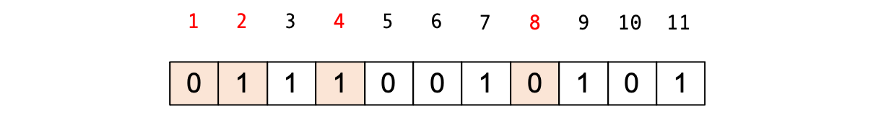
[9]

### Generatoren Matrix
Die Generatormatrix G dient zur einfachen Codierung der Ausgangswörter. Zunächst werden die Klartextzeichen redundanzfrei binär
codiert. Anschliessend werden diese Binärwörter jeweils mithilfe der Generatormatrix auf die Codewörter abgebildet:

**G** = 
$\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 
0 & 0 & 0 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 & 1 & 0 & 1 \\ 
0 & 0 & 0 & 0 & 1 & 1 & 1 \\
0 & 0 & 0 & 1 & 0 & 0 & 1 \\ 
0 & 0 & 0 & 1 & 0 & 1 & 1 \\ 
\end{bmatrix}$ * $\begin{bmatrix}
1\\
0\\
0\\
1\\
1\\
0\\
1\\
\end{bmatrix}$ = $\begin{bmatrix}
1\\
0\\
0\\
1\\
1\\
0\\
1\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}$

[4]

### Decode

Um zu decodieren und zu bestimmen, ob die Daten korrekt sind, nehmen wir die binären Formen der Bitpositionen, deren Bit gesetzt ist und dann XOR.

Wenn die Bitpositionen und deren Bit gesetzt ist, mit XOR XORieren und keine Fehler auftreten, ist das Ergebnis 0.

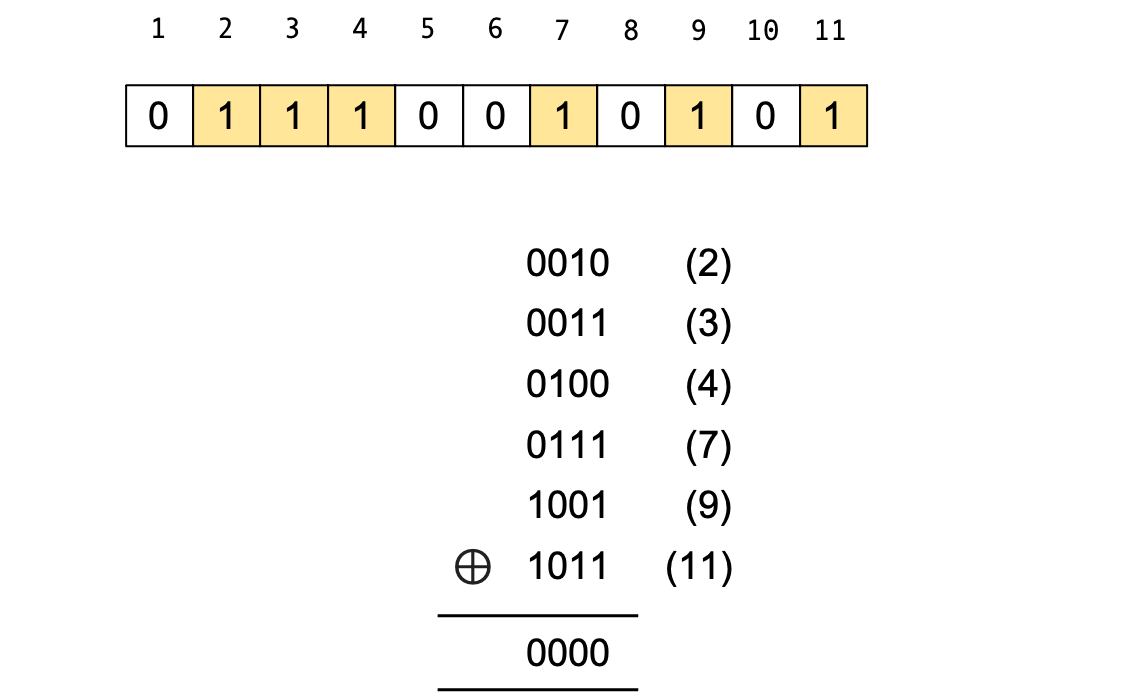

Tatsächlich können auch die Bitpositionen ausgewählt werden, bei denen das Bit nicht gesetzt ist (0). In beiden Fällen bedeutet dies, dass kein Fehler vorliegt.
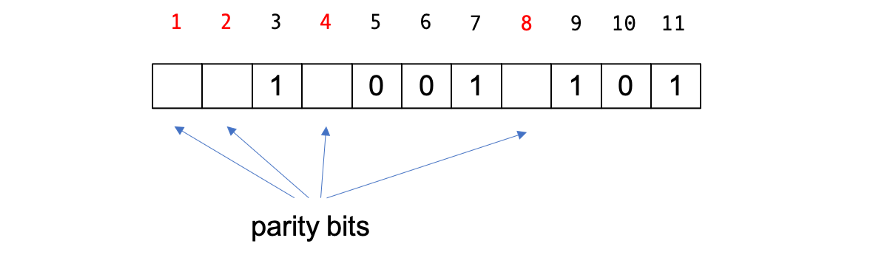
Die Bitpositionen, deren Bit gesetzt ist, wenden XOR an. Das passiert bevor die Paritätsbits gesetzt werden.

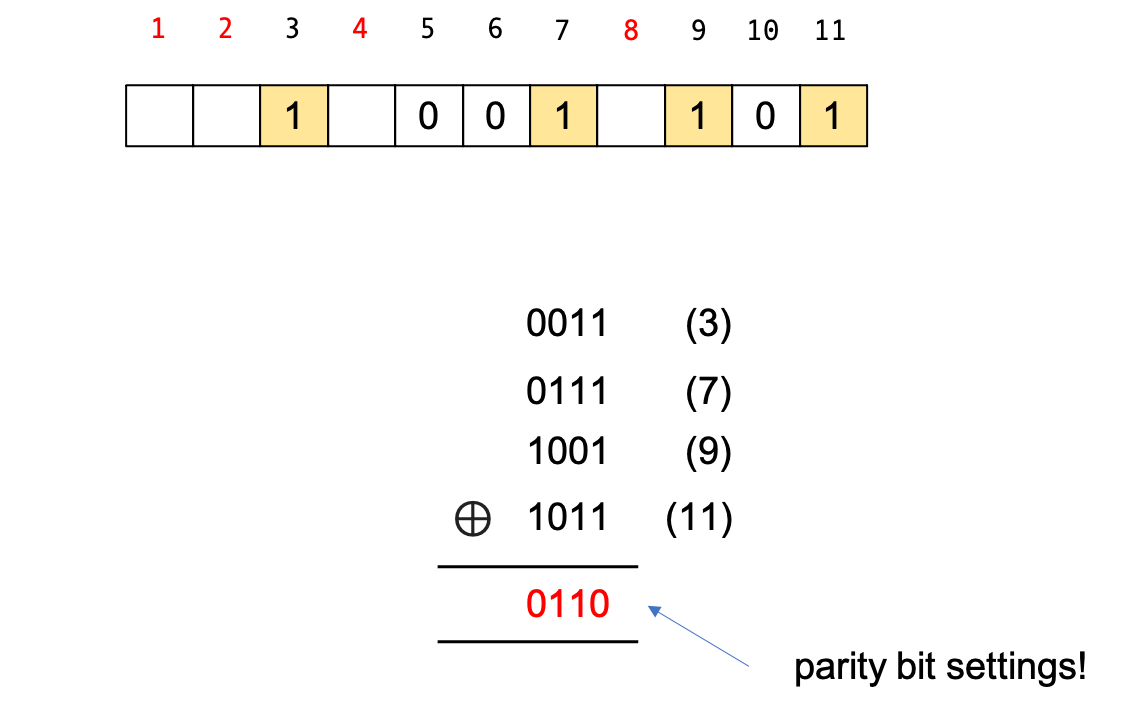
Das Ergebnis des XOR ist im Grunde die Paritätsbitsetzung. Dies ist eine schnelle Möglichkeit, die Paritätsbits zu codieren.


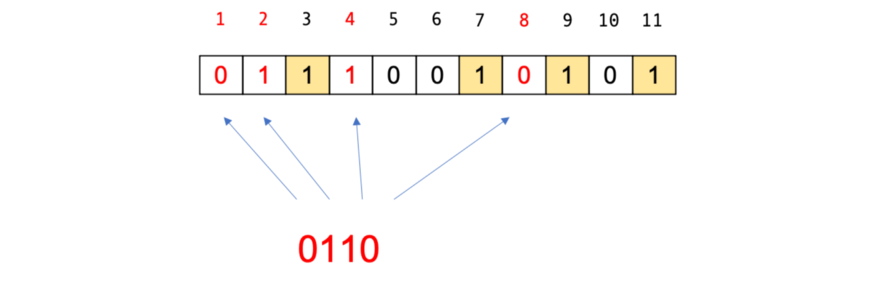
Wenn die übertragene Nachricht einen Fehler enthält, erhalten Sie beim Decodieren den Ort des Fehlers! Anstelle einer 0 wird beispielsweise der Wert an Bitposition 10 umgedreht und jetzt auf 1 gesetzt.

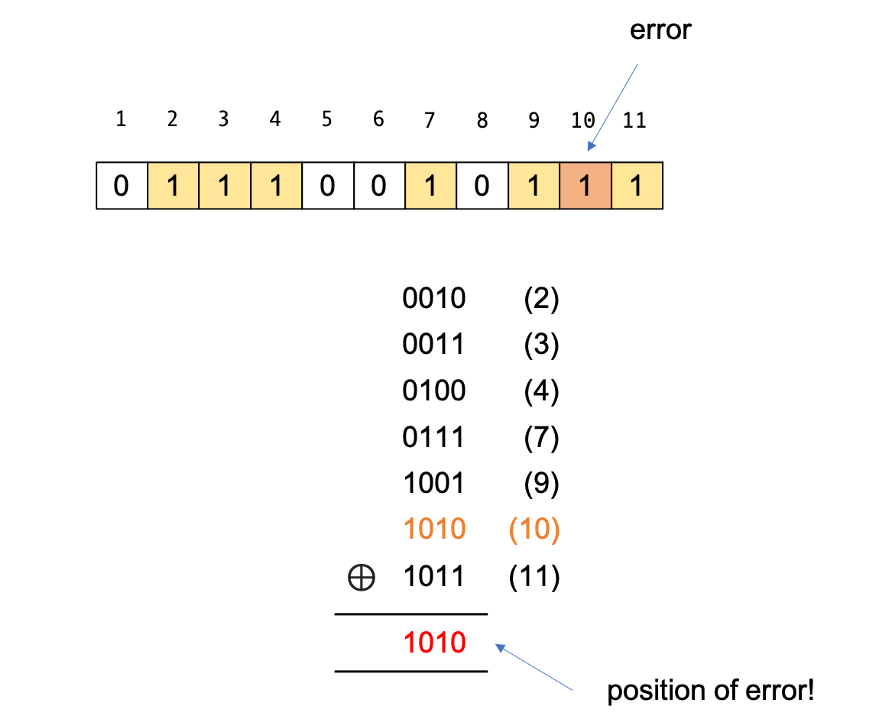
Wenn man die gesetzten Bitpositionen XOR setzt, erhält man anstatt 0 die Position, an der der Fehler auftritt. Dies liegt daran, dass sich alles andere während des XOR aufhebt, ausser dem fehlerhaften Bit.
Wenn der Empfänger ein solches Ergebnis erhält, erkennt er sofort die Position des Fehlers und kann ihn zurückdrehen, wodurch sich der Code selbst korrigiert. So funktioniert Hamming-Code. [9]

#### Paritycheck- Matrix

Man kann auch mit einer Paritycheck-Matrix dekodieren, diese wird wie folgt erstellt und damit der Code überprüft:

**H** = 
$\begin{bmatrix}
0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\ 
0 & 1 & 1 & 1 & 1 & 0 & 1 & 0 & 0\\ 
1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\
1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}$ * $\begin{bmatrix}
1\\
0\\
0\\
1\\
1\\
0\\
1\\
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}$ = $\begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}$

Ergibt es am Ende wieder 0 dann ist kein Fehler aufgetreten, gibt es irgendwo 1 verrät das Codewort gerade auch wo der Fehler liegt. Siehe Beispiel aus dem Video aus [4]

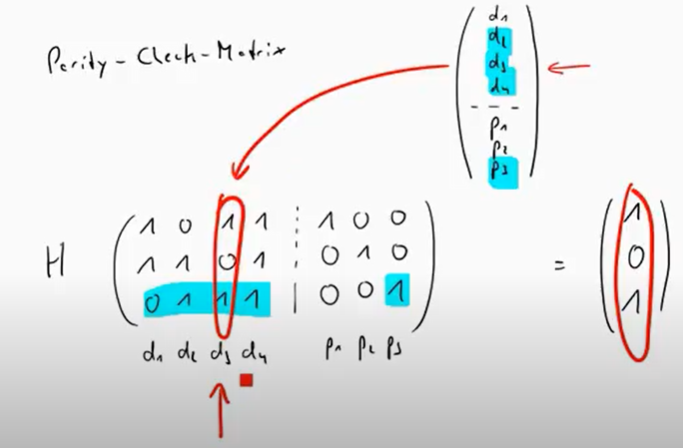

`k => Prüfbits` 

Dass heisst => $2^k - 1$ können überwacht werden

Zu den Bits die überwacht werden gehören auch die Prüfbits, dass heisst wieder das $2^k -1- k$ Datenbitsverwenden werden können.

|k|$2^k - 1$|$2^k - 1 - k$|%|Hamming Code|
|---|---|---|---|---|
|3|7|4|57| (7,4) |
|4|15|11|73|(15,11) |
|5|31|26|84| (31,26)|


#### Fehlerkorrigierend

Ein beliebiger Code C mit Mindestabstand dc ist **[$\frac{dc-1}{2}$]** Fehler korrigierend!
    
##### Perfekter Code
**Definition:** Ein Blockcode mit ungeraden Mindestabstand **dc = 2e+1**, bei dem die Vereinigung paarweise disjunkte Kugeln $U_a$ $\in$c$K_e$(a) eine Überdeckung von $\sum^n$ ist, heisst perfekt.

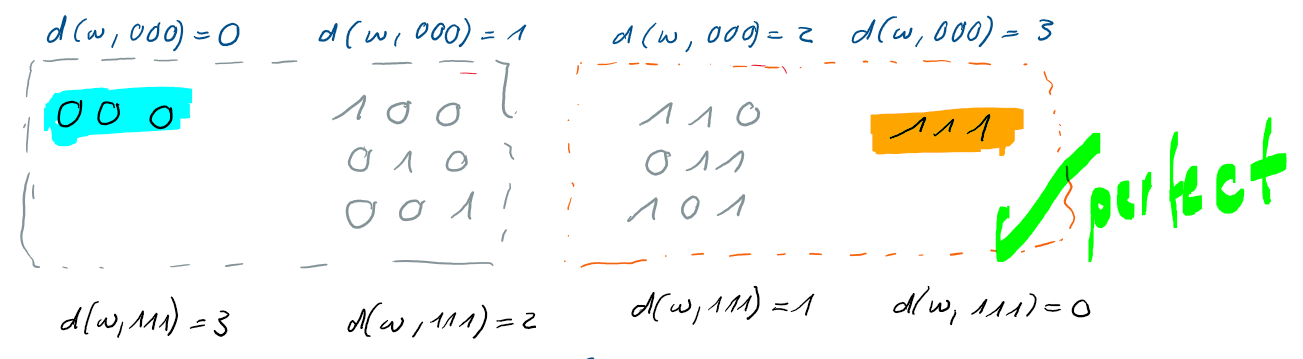

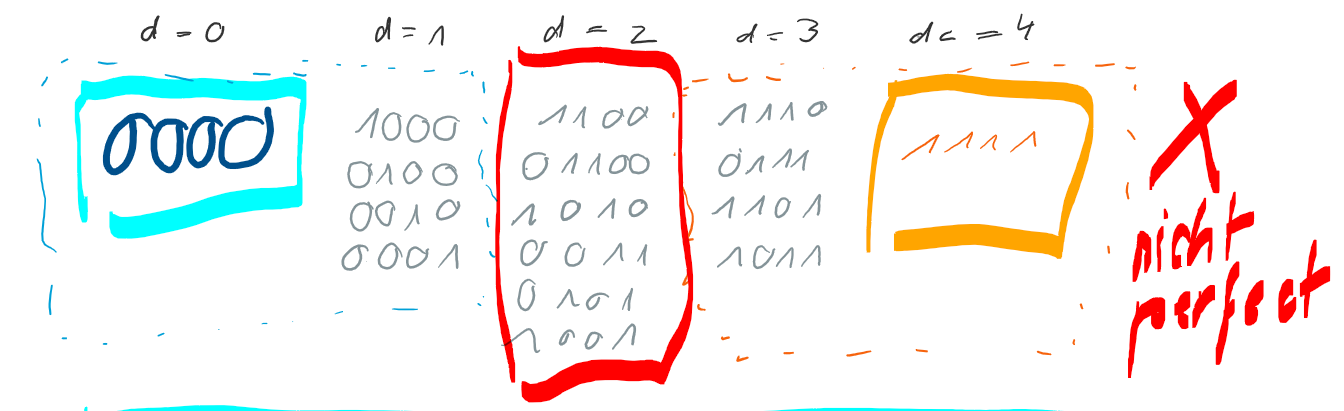

Ein Code der umso mehr Fehler erkennt, je grösser sein Mindestabstand ist, dieser sollte maximal sein. Je grösser der Mindestabstand ist, je grösser die zu übertragenden Daten! $=>$ dieswn minimal halten.

**Satz** *Minimalgewicht = Minimaldistanz*: 

Sei C ein linearer Code. Dann gilt: `g(C) = d(C)` 

Nun zum programmierten Hamming-Code:

In [1]:
import numpy as np
import itertools

Hier wurden Hilfsfunktionen erstellt, um den Code ein bisschen zu kürzen.
* Funktion str_to_array => hier wird der String in ein Array umgewandelt mit der Library Numpy
* Funktion array_to_str => hier wir der Array in ein String umgewandelt
* Funktion swap => hier wird zuerst der String in ein Array umgewandelt, danach werden die Positionen der Indexes ausgetauscht und zum Schluss wieder zu einem String zusammengeführt. 

In [2]:
def str_to_array(word: str) -> np.ndarray:
    return np.array(list(word), dtype=int)


def array_to_str(array: np.ndarray) -> str:
    code = ""
    for i in array.tolist():
        code += str(int(i))
    return code


def swap(word: str, position: int) -> str:
    array = list(word)
    array[position] = str((int(array[position]) + 1) % 2)
    return "".join(array)

Nun kommen wir zu der Klasse `HammingCode` wie uns im Auftrag vorgegeben wurde. Alle Funktionen wie im Auftrag vorgegeben wurden umgesetzt, inklusive des Paritiy-Checks. Am Ende der Klasse wird ein Wort eingegeben und eine Grösse für k. Dabei wird das Original Wort angezeigt, danach das "Encodete" Wort und zum Schluss sollte das "Dekodierte" Wort wieder dem Original entsprechen. 
Die Funktionen sind im Code selber oberhalb der Funktionen beschrieben.

In [3]:
class HammingCode:
    """
    Class to de- and encode using Hamming codes of length n=2^k-1
    """
    def __init__(self, k: int):
        if k < 2 or not (isinstance(k, int)):
            raise ValueError("k must be an int with value >= 2")
        self.parity_length = k
        self.codeword_length = (2 ** k) - 1

    def get_generator_matrix(self) -> np.ndarray:
        check_matrix = self.get_check_matrix()

        parity_matrix = []
        for i in range(self.codeword_length):
            if i not in self.get_parity_bit_index():
                parity_matrix.append(check_matrix.T[i])

        parity_matrix = np.array(parity_matrix).T
        #    print("parity_matrix\n", parity_matrix)
        data_matrix = np.identity(self.get_length(), dtype=int)

        generator_matrix = []
        parity_index, data_index = 0, 0
        for i in range(self.codeword_length):
            if i in self.get_parity_bit_index():
                row = parity_matrix[parity_index]
                parity_index += 1
            else:
                row = data_matrix[data_index]
                data_index += 1
            generator_matrix.append(row)
            array_generator_matrix = np.array(generator_matrix)
        return array_generator_matrix
    
    def bit_set(self, number: int, position: int):
        string_format = "{0:0" + str(self.parity_length) + "b}"
        binary_string = string_format.format(number)
        return int(binary_string[position])

    def get_check_matrix(self) -> np.ndarray:
        array = []
        string_format = "{0:0" + str(self.parity_length) + "b}"

        for i in range(self.codeword_length):
            code = string_format.format(i + 1)
            array.append(str_to_array(code[::-1]))

        return np.array(array, dtype=int).T

    def encode(self, word: str) -> str:
        """
        Encode a word
        """
        codeword = (self.get_generator_matrix() @ str_to_array(word)) % 2
        return array_to_str(codeword)

    def decode(self, codeword: str) -> str:
        """
        decode a codeword and correct errors
        """
        check_code = self.check(codeword)
        if check_code == "0" * self.parity_length:
            return self.decode_codeword(codeword)

        # correction
        error_position = self.get_error_index(check_code)
        corrected = swap(codeword, error_position)
        return self.decode_codeword(corrected)

    def decode_codeword(self, codeword):

        word = "";
        for i in range(self.codeword_length):
            if i in self.get_parity_bit_index():
                continue
            word += codeword[i]
        return word

    def check(self, codeword: str) -> str:
        """
        Check if the provided codeword is a correct codeword
        """
        correction = (self.get_check_matrix() @ str_to_array(codeword)) % 2
        return array_to_str(correction)

    def get_length(self) -> int:
        return self.codeword_length - self.parity_length

    def get_error_index(self, error_code: str) -> int:
        Hm = self.get_check_matrix()
        correction_codes = []

        for array in Hm.T:
            correction_codes.append(array_to_str(array))
        if not error_code in correction_codes:
            raise ValueError("invalid error_code " + str(error_code))
        return correction_codes.index(error_code)
    def get_parity_bit_index(self):
        indexes = []
        for i in range(self.parity_length):
            indexes.append(2 ** i - 1)
        return indexes

In [7]:
hc = HammingCode(3)
codeword = "1010"
print("the original word " + codeword)

the original word 1010


In [15]:
hc.get_generator_matrix()

array([[1, 1, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [8]:
encoded = hc.encode(codeword)
print("the encoded word " + encoded)

the encoded word 1011010


In [13]:
hc.get_check_matrix()

array([[1, 0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1]])

In [10]:
print("here the word decoded back " + hc.decode(encoded))

here the word decoded back 1010


## Fazit

Der Hamming-Code hat viele Vorteile. Sie werden für verschiedene Zwecke in vielen Anwendungen eingesetzt. In Netzen, in denen Datenströme mit Einzelbitfehlern geliefert werden, ist der Ansatz der Hamming-Codierung wirksam. Der Hamming-Code erkennt nicht nur Bitfehler, sondern hilft auch bei der Identifizierung von fehlerhaften Bits, damit diese repariert werden können. 
Aufgrund ihrer Einfachheit sind Hamming-Codes ideal für Computerspeicher und Einzelfehlerkorrektur. 
Nachteile des Hamming-Codes sind Fehlererkennung und Korrekturcode für einzelne Bits. Wenn mehrere Bits als falsch erkannt werden, kann dies dazu führen, dass ein anderes Bit, das korrekt sein sollte, verändert wird. Dies kann dazu führen, dass die Daten noch fehlerhafter werden.  Der Hamming-Codierungsalgorithmus kann nur Probleme mit einzelnen Bits lösen und der Hamming-Code ist eine Methode zur Kodierung einer Nachricht. 

Die Arbeit hat mir sehr dazu verholfen das Ganze zu verstehen. Ich fand diese Semesterarbeit sehr zeitaufwändig, ich habe mehr als 10 Stunden gebraucht, aber sehr aufschlussreich.

## Quellen
[1] Moodle FFHS, https://moodle.ffhs.ch, verfügbar bei https://moodle.ffhs.ch/mod/assign/view.php?id=3892120, [Zugriff:01.11.2021]

[2] Mathematik für Informatiker, _Rolf Socher_, _2011_, Verlag Fachbuchverlag Leipzig im Carl Hanser Verlag

[3] Wikipedia, Hamming Code (English version, verfügbar bei https://en.wikipedia.org/wiki/Hamming_code, [Zugriff:01.11.2021]

[4] Konkrete Mathematik (nicht nur) für Informatiker, _Weiz Edmund, 2018_,  (http://weitz.de/KMFI/)

[5] Offizielle Dokumentation von https://docs.python.org/3, https://numpy.org/, https://pypi.org/project/more-itertools/

[6] Stack Overflow, https://stackoverflow.com, verfügbar bei  (https://stackoverflow.com/users/2828611/inetphantom), [Zugriff:12.11.2021]

[7] Error Dedecting , Error Correcting Code, _Hamming R.W._, _1950_, Bell System Technical Journal 1950

[9] Levelup Gitconnect, https://levelup.gitconnected.com, verfügbar bei https://levelup.gitconnected.com/explaining-error-detection-and-correction-codes-with-python-be517596d42f [Zugriff: 14.11.2021]

[10] Maths is fun, https://www.mathsisfun.com, verfügbar bei https://www.mathsisfun.com/definitions/parity-bit.html [Zugriff: 14.11.2021]